In [3]:
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score
from matplotlib import pyplot as plt

In [ ]:
X_train = np.loadtxt('../data/ds1_train.csv', delimiter=',', usecols=[0, 1], skiprows=1)
y_train = np.loadtxt('../data/ds1_train.csv', delimiter=',', usecols=[2], skiprows=1)
X_test = np.loadtxt('../data/ds1_valid.csv', delimiter=',', usecols=[0, 1], skiprows=1)
y_test = np.loadtxt('../data/ds1_valid.csv', delimiter=',', usecols=[2], skiprows=1)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(penalty='l1')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.9
              precision    recall  f1-score   support

         0.0       0.95      0.84      0.89        50
         1.0       0.86      0.96      0.91        50

    accuracy                           0.90       100
   macro avg       0.91      0.90      0.90       100
weighted avg       0.91      0.90      0.90       100



In [32]:
def plot(x, y, theta, save_path=None, correction=1.0):

    plt.figure()
    plt.plot(x[y == 1, -2], x[y == 1, -1], 'bx', linewidth=2)
    plt.plot(x[y == 0, -2], x[y == 0, -1], 'go', linewidth=2)

    margin1 = (max(x[:, -2]) - min(x[:, -2]))*0.2
    margin2 = (max(x[:, -1]) - min(x[:, -1]))*0.2
    x1 = np.arange(min(x[:, -2]) - margin1, max(x[:, -2]) + margin1, 0.01)
    x2 = -(theta[0] / theta[2] * correction + theta[1] / theta[2] * x1)
    plt.plot(x1, x2, c='red', linewidth=2)
    plt.xlim(x[:, -2].min() - margin1, x[:, -2].max() + margin1)
    plt.ylim(x[:, -1].min() - margin2, x[:, -1].max() + margin2)

    plt.xlabel('x1')
    plt.ylabel('x2')
    if save_path is not None:
        plt.savefig(save_path)


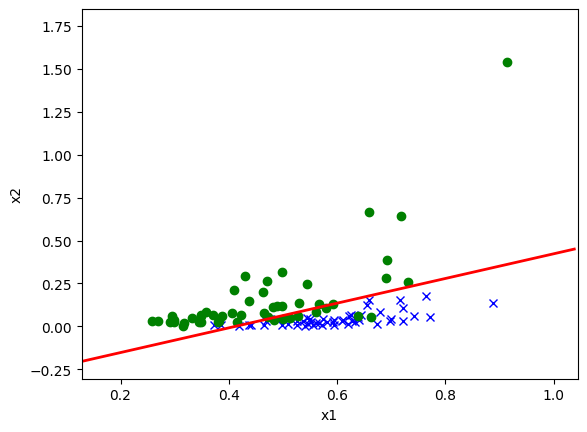

In [48]:
plot(X_test, y_test, np.append(model.intercept_, model.coef_[0]))